## cloning yolov5 repo

In [1]:
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14435, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 14435 (delta 0), reused 2 (delta 0), pack-reused 14430
Receiving objects: 100% (14435/14435), 13.36 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (9978/9978), done.
/content/yolov5


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 1.6 MB 15.3 MB/s 
Setup complete. Using torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## Downloading and unzipping data

In [5]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# Export code snippet and paste here
%cd /content 
#curl -L "https://drive.google.com/file/d/1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX/view?usp=sharing" > TrainingSignData.zip; unzip TrainingSignData.zip; rm TrainingSignData.zip

/content


In [7]:
!gdown --id 1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gQD1OovQDyjMlUEWl6IEn2mzgS6KNppX
To: /content/1144images_dataset.zip
100% 949M/949M [00:14<00:00, 64.9MB/s]


In [8]:
#unzip the file
!unzip 1144images_dataset.zip; rm 1144images_dataset.zip

Archive:  1144images_dataset.zip
   creating: 1144images_aryan/
   creating: 1144images_aryan/test_aryan/
  inflating: 1144images_aryan/test_aryan/00003.png  
  inflating: 1144images_aryan/test_aryan/00003.txt  
  inflating: 1144images_aryan/test_aryan/00006.png  
 extracting: 1144images_aryan/test_aryan/00006.txt  
  inflating: 1144images_aryan/test_aryan/00008.png  
  inflating: 1144images_aryan/test_aryan/00008.txt  
  inflating: 1144images_aryan/test_aryan/00011.png  
  inflating: 1144images_aryan/test_aryan/00011.txt  
  inflating: 1144images_aryan/test_aryan/00028.png  
  inflating: 1144images_aryan/test_aryan/00028.txt  
  inflating: 1144images_aryan/test_aryan/00035.png  
  inflating: 1144images_aryan/test_aryan/00035.txt  
  inflating: 1144images_aryan/test_aryan/00037.png  
  inflating: 1144images_aryan/test_aryan/00037.txt  
  inflating: 1144images_aryan/test_aryan/00038.png  
  inflating: 1144images_aryan/test_aryan/00038.txt  
  inflating: 1144images_aryan/test_aryan/00040

## Define Model Configuration and Architecture

In [26]:
!cat ../data.yaml

train: ../1144images_dataset/train
val: ../1144images_dataset/test
nc: 77
names: ['200m',
        '50-100m',
        'Ahead-Left',
        'Ahead-Right',
        'Axle-load-limit',
        'Barrier Ahead',
        'Bullock Cart Prohibited',
        'Cart Prohobited',
        'Cattle',
        'Compulsory Ahead',
        'Compulsory Keep Left',
        'Compulsory Left Turn',
        'Compulsory Right Turn',
        'Cross Road',
        'Cycle Crossing',
        'Compulsory Cycle Track',
        'Cycle Prohibited',
        'Dangerous Dip',
        'Falling Rocks',
        'Ferry',
        'Gap in median',
        'Give way',
        'Hand cart prohibited',
        'Height limit',
        'Horn prohibited',
        'Humpy Road',
        'Left hair pin bend',
        'Left hand curve',
        'Left Reverse Bend',
        'Left turn prohibited',
        'Length limit',
        'Load limit 5T',
        'Loose Gravel',
        'Major road ahead',
        'Men at work',
        'Motor vehic

In [21]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [22]:
num_classes

'77'

There are 77 images classes are being used

In [23]:
#this is the model configuration we will use 
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [12]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [13]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [30]:
%%time
%cd /content/yolov5/
!python train.py --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --batch-size 8 --epochs 20 --name Model

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-213-gbe9ef38 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

GROUND TRUTH TRAINING DATA:


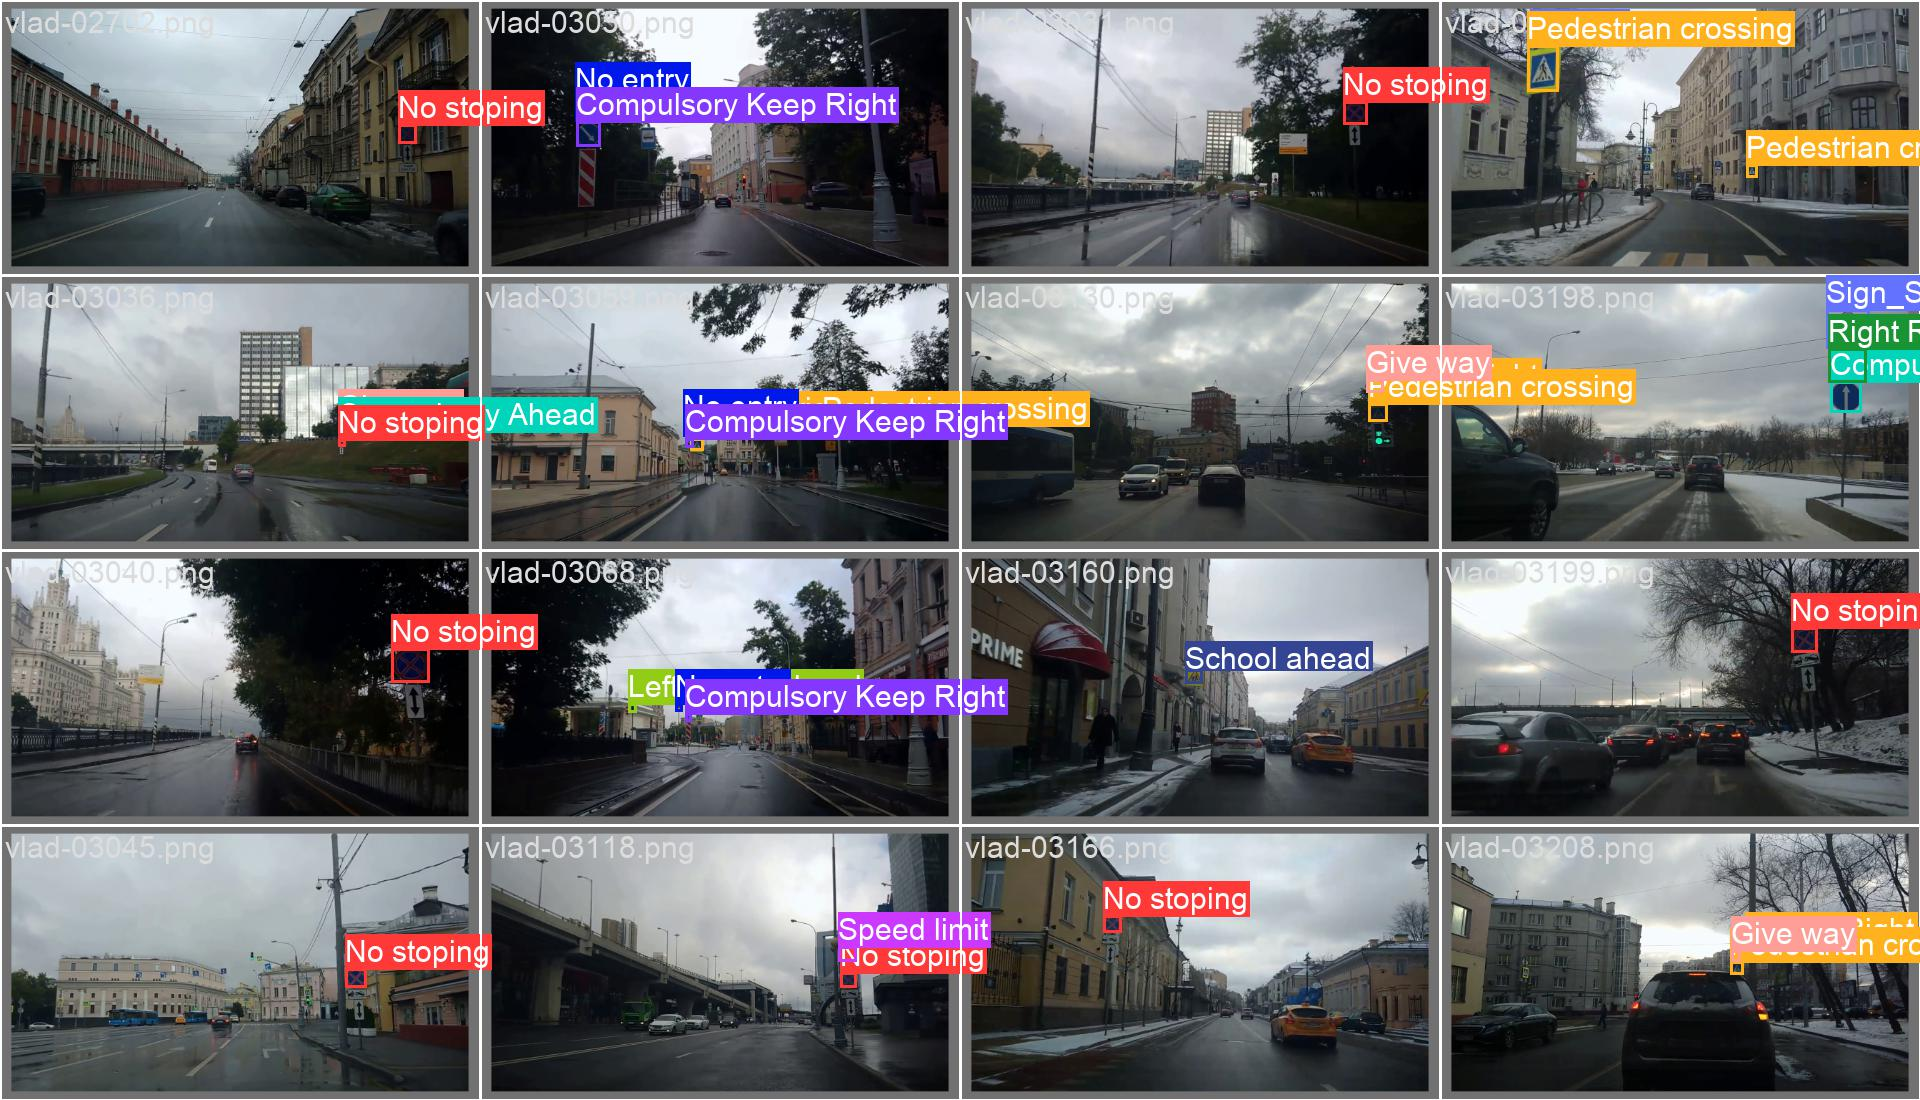

In [31]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/Model6/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGUMENTED TRAINING DATA:


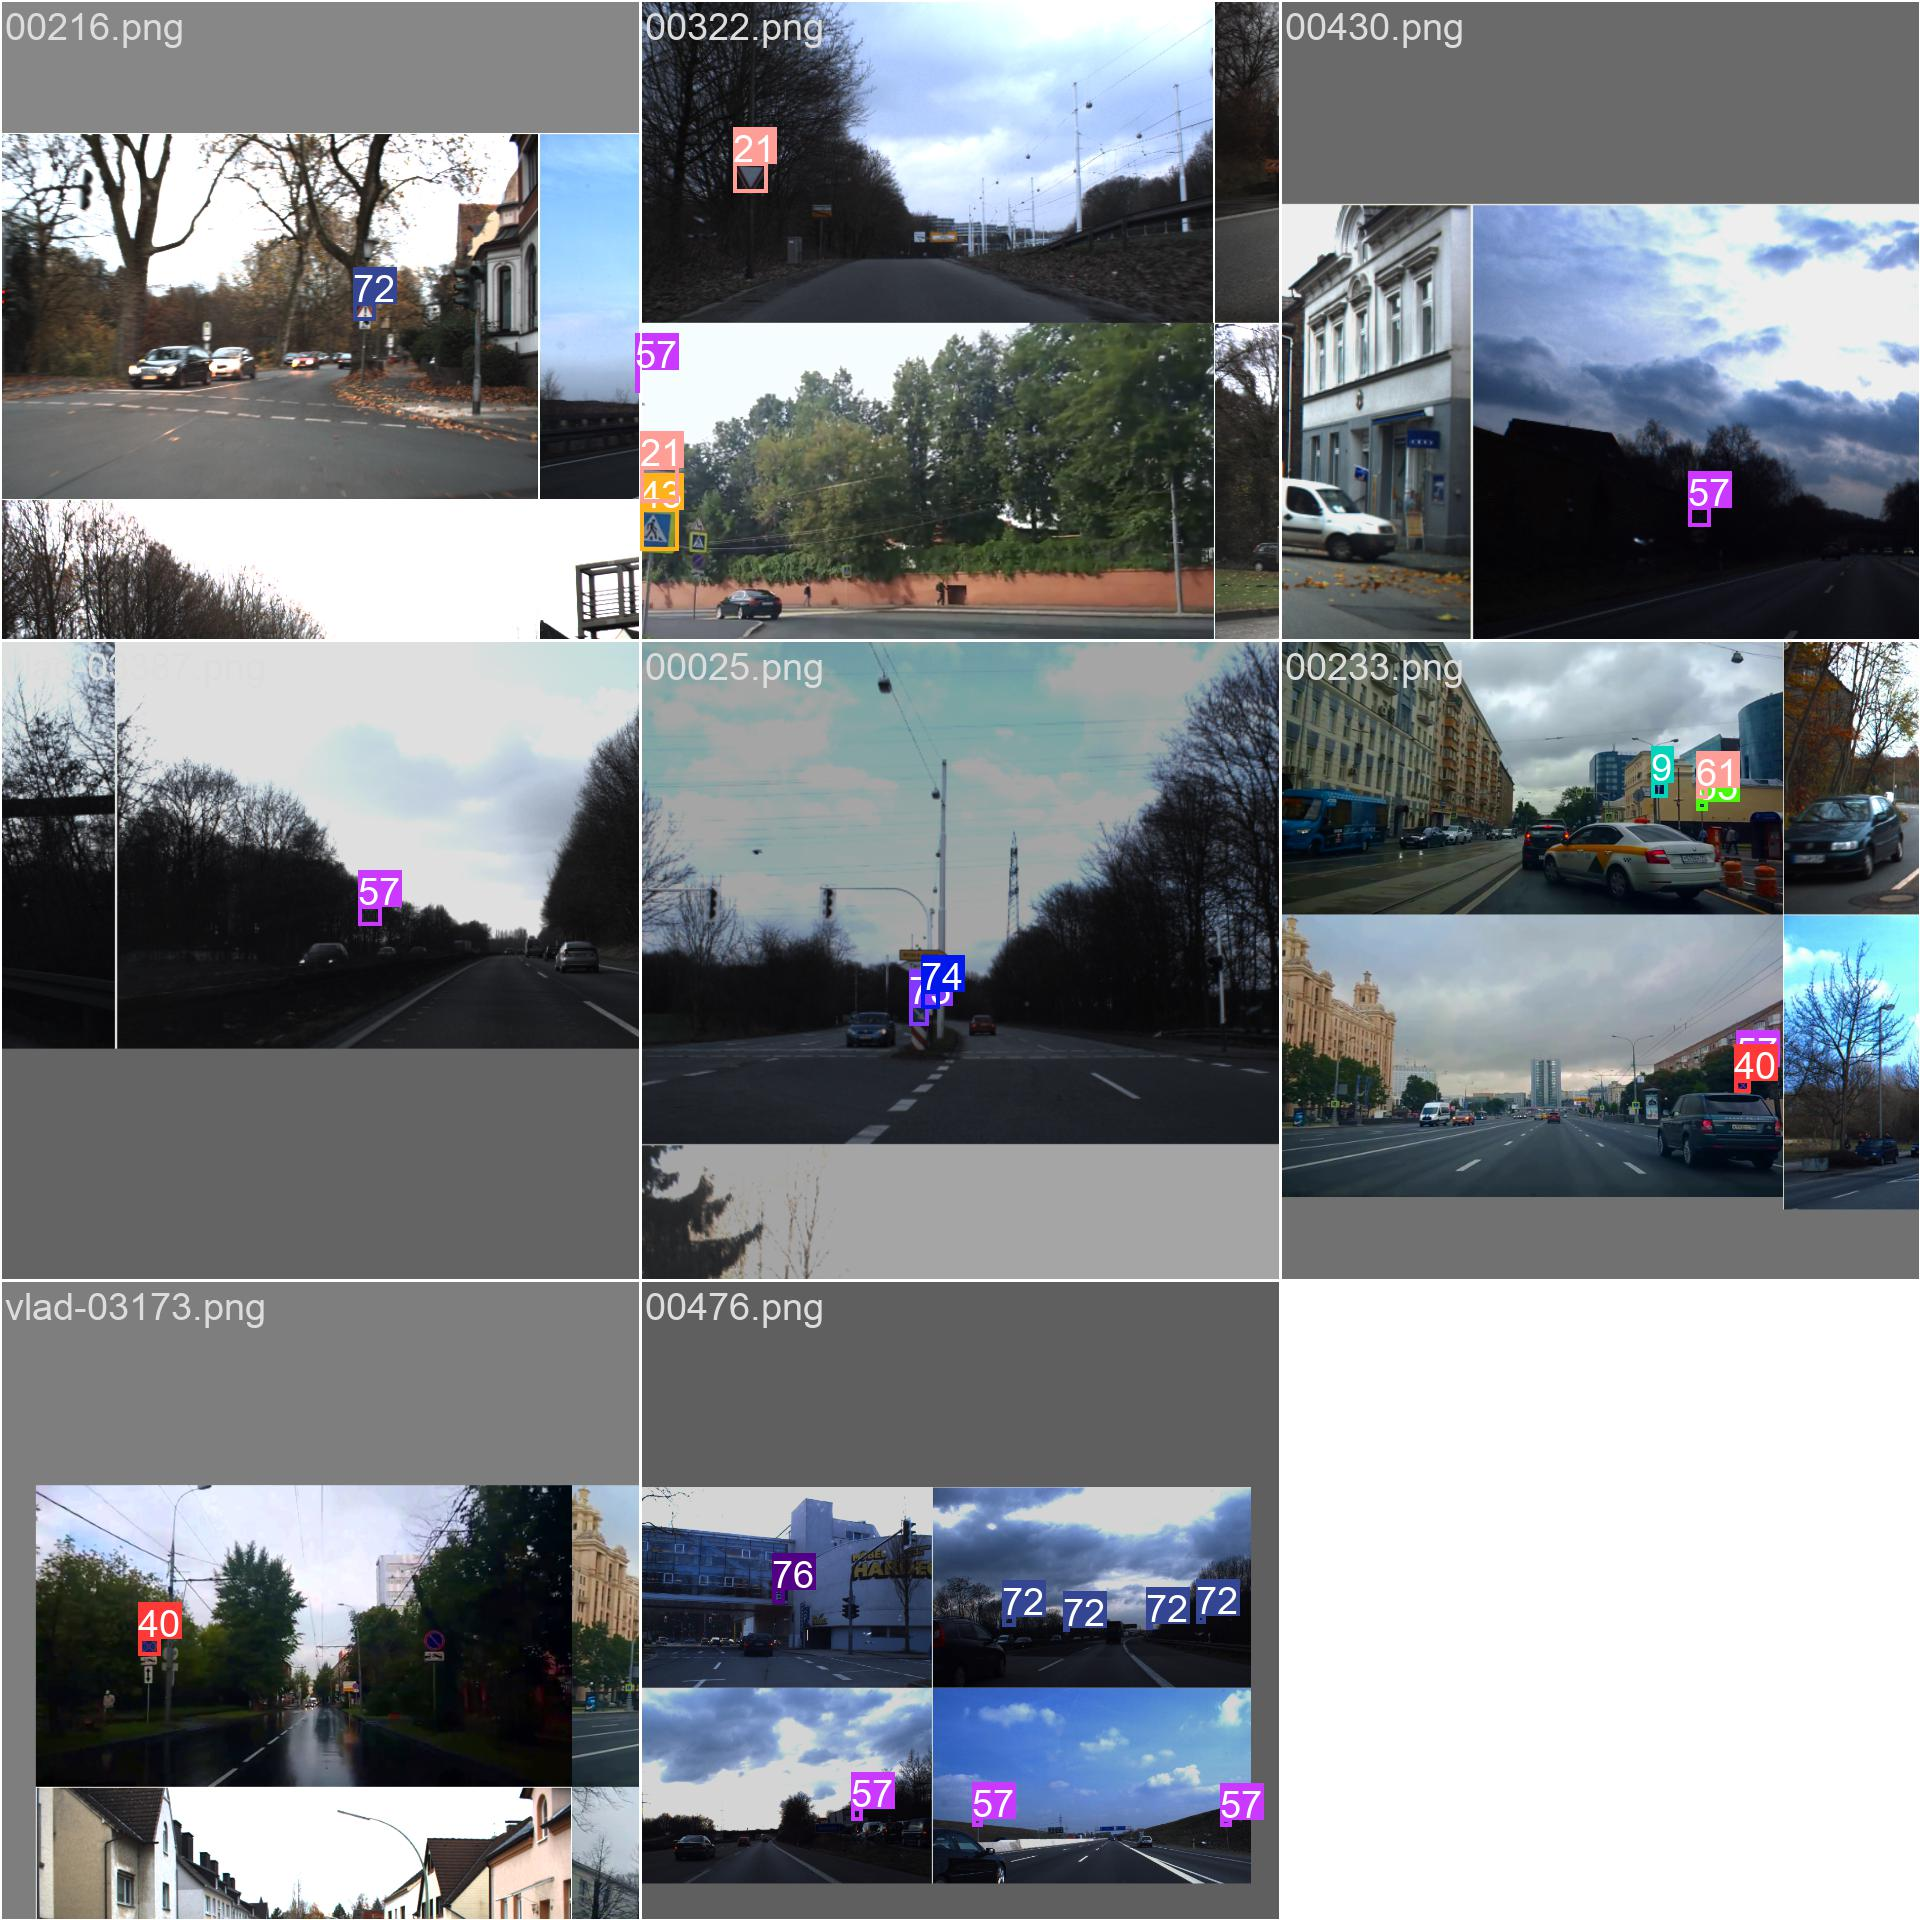

In [32]:
print("GROUND TRUTH AUGUMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/Model6/train_batch0.jpg', width=900)

In [34]:
%cd /content/yolov5/
!python detect.py --source ../Sample_1.png --weights runs/train/Model6/weights/best.pt

/content/yolov5
detect: weights=['runs/train/Model6/weights/best.pt'], source=../Sample_1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-213-gbe9ef38 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7451490 parameters, 0 gradients
image 1/1 /content/Sample_1.png: 384x640 1 No stoping, 1 Speed limit, 13.6ms
Speed: 0.5ms pre-process, 13.6ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
